# Decorator overview

A decorator is a function that can take a function as an argument, extend its functionality, and return a modified function with extended functionality. 

That is, a decorator takes a function but ***unless it returns a function***, it won’t be a decorator.

The main objective of decorator functions is to extend the functionality of existing functions without modifying those functions.

**SYNTAX:**

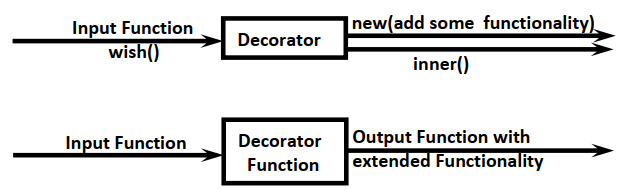

> ***Note**: `input_function( )` & `output_function( )` parameters/arguments must be the same.*

In [2]:
def decorator_function(input_function):

  def output_function():
    # Extended functionality
    input_function()
    # Extended functionality
    
  return output_function

# Ilusttration

In [3]:
def wish(name):
  print("Hello",name,"Good Morning")

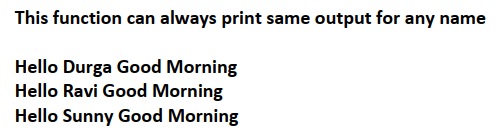

But we want to modify this function to provide a different message if the name is Sunny. 

We can do this without touching the **wish( )** function by using the decorator. 

**Example 1**

In [4]:
def decor(func):
  def inner(name):      # must have same number of arguments as wish( ) function
    if name=="Sunny":
      print("Hello Sunny Bad Morning")
    else:
      func(name)
  return inner

@decor
def wish(name):
  print("Hello",name,"Good Morning")

wish("Durga")
wish("Ravi")
wish("Sunny")

Hello Durga Good Morning
Hello Ravi Good Morning
Hello Sunny Bad Morning


**Example 2**

In [6]:
def decor_add(func):
  def inner(x, y):        # must have same number of arguments as add( ) function
    print('#' * 30)
    print('The summ: ', end='')
    func(x,y)
    print('#' * 30)
  return inner


@decor_add
def add(a, b):
  print(a + b)

add(10,20)

##############################
The summ: 30
##############################


**NOTE:**
* Whenever the **`wish( )`** function is executed, pvm will check if any decrator configured or not.
* If it has then instead of executing the **`wish( )`** function, pvm will execute the **`decor( )`** function and pass **`wish( )`** as an argument to the **`decor( )`** function.
* Also it is important that **`wish( )`** and the **`inner( )`** function within **`decor( )`** must have same arguments. 
    * That is → ***while defining a decorator number of arguments must be matched.**
* Compulsory we need to define the decorator first then we can use it on a function.
    * That is → ***decorator function should be defined first and then use.***

# How to call the same function with the decorator and without the decorator?

We should not use **@decor**.

In [7]:
def decor(func):
  def inner(name):
    if name=="Sunny":
      print("Hello Sunny Bad Morning")
    else:
      func(name)
  return inner

def wish(name):
  print("Hello",name,"Good Morning")

decorfunction=decor(wish)

wish("Durga")             # decorator wont be executed
wish("Sunny")             # decorator wont be executed

decorfunction("Durga")    # decorator will be executed
decorfunction("Sunny")    # decorator will be executed

Hello Durga Good Morning
Hello Sunny Good Morning
Hello Durga Good Morning
Hello Sunny Bad Morning


# @decorator internal representation by PVM

**@decor equivalent statement→ func = decor(func)**

## with @decor syntax

In [8]:
@decor
def wish(name):
  print("Hello",name,"Good Morning")

In [9]:
# decorator will be executed
wish("Durga")    # Hello Durga Good Morning
wish("Sunny")    # Hello Sunny Bad Morning

Hello Durga Good Morning
Hello Sunny Bad Morning


## without @decor syntax

In [10]:
def wish(name):
  print("Hello",name,"Good Morning")
wish = decor(wish) # @decor equivalent statement

In [11]:
# decorator will be executed
wish("Durga")    # Hello Durga Good Morning
wish("Sunny")    # Hello Sunny Bad Morning

Hello Durga Good Morning
Hello Sunny Bad Morning


# Problem with @decorator syntax

The problem with **@decorator** syntax is that the decorator nested function **replaces the original input function metadata** such as function name, doc string, etc.

## Problem Illustration

In [12]:
def decor(func):
  def inner(name):      # must have same number of arguments as wish( ) function
    '''inner doc string'''
    if name=="Sunny":
      print("Hello Sunny Bad Morning")
    else:
      func(name)
  return inner

@decor
def wish(name):
  '''wish doc string'''
  print("Hello",name,"Good Morning")

wish("Kiran")   # Hello Kiran Good Morning
wish("Sunny")   # Hello Sunny Bad Morning

print(wish.__name__)  # inner
print(wish.__doc__)   # inner doc string

Hello Kiran Good Morning
Hello Sunny Bad Morning
inner
inner doc string


## Solution

In [15]:
import functools

def decor(func):
  ###################
  @functools.wraps(func)
  def inner(name):      # must have same number of arguments as wish( ) function
    '''inner doc string'''
    if name=="Sunny":
      print("Hello Sunny Bad Morning")
    else:
      func(name)
  return inner

@decor
def wish(name):
  '''wish doc string'''
  print("Hello",name,"Good Morning")

wish("Kiran")   # Hello Kiran Good Morning
wish("Sunny")   # Hello Sunny Bad Morning

print(wish.__name__)  # wish
print(wish.__doc__)   # wish doc string

Hello Kiran Good Morning
Hello Sunny Bad Morning
wish
wish doc string


Use the **`@functools.wraps( )`** decorator function in the decorator function definition to keep the original function metadata.

We have to import **`functools`** module.

# Decorator with parameters

The decorator with parameter is equivalent to → **Decorator returning a Decorator function**.

## General/Normal Decorator

In [16]:
@decor
def my_function():
  pass

## Equivalence

```
my_function = decor(my_function)
my_function = output_function
```

## Decorator with parameters

In [19]:
@decor
def my_function(arg):
  pass

## Equivalence

```
my_function = decor(arg)(my_function)
my_function = inner_decor(my_function)
my_function = output_function
```

# Syntax → Decorator with parameters

In [21]:
import functools

def outer_decor(arg):

  def inner_decor(input_function):
  
    @functools.wrap(input_function)
    def output_function():
    # Extended functionality
      print(arg)
      input_function()      
      
    return output_function    # return extended function
    
  return inner_decor          # returning inner decorator

# Generic Decorator for any function

The rule for applying a decorator to a function is that → **parameter/arguments of `input_function( )` and `output_function( )` of a decorator must match.**

Otherwise, we’ll get an error.

In [22]:
def decorator(input_function):
    def output_function(): 
        # Extended functionality
        input_function()
        # Extended functionality

    return output_function

In [23]:
@decorator
def one_param_function(arg):
  pass

if __name__ == '__main__':
    one_param_function("kiran")   # TypeError: decorator.<locals>.output_function() takes 0 positional arguments but 1 was given

TypeError: decorator.<locals>.output_function() takes 0 positional arguments but 1 was given

***A generic decorator is a decorator that can be assigned to any function.***

In [24]:
def decorator(input_function):

  def output_function(*args, **kwargs): # make parameters variable-length for generic decorator.
    # Extended functionality
    input_function()
    # Extended functionality
    
  return output_function

In [25]:
@decorator
def no_param_function():
  pass

In [26]:
@decorator
def one_param_function(arg):
  pass

In [27]:
@decorator
def multi_param_function(*args, **kwargs):
  pass

# Decorator Chaining

We can define multiple decorators for the same function and all these decorators will form **Decorator Chaining**.

**Example:**
```
@decor1
@decor0
def num():
  pass
```

For the **num( )** function, we are applying 2 decorator functions. ***The first inner decorator `(decor0)` will be applied and then the outer decorator `(decor1)`.***

In case of mulitple decorator function configured, only one decorator function executed that is the outer most decorated function.

In [29]:
def decor1(func):
  def inner():
    x=func()
    return x*x
  return inner

def decor0(func):
  def inner():
    x=func()
    return 2*x
  return inner

@decor1
@decor0
def num():
  return 10

print(num())  # 400

400


**`num( )` → `decor0( )` → `return inner( )` → `decor1( )` → `return inner( )`**

The final output function is **`inner( )`** which will be executed only.

In [30]:
def decor1(func):
  def inner():
    print('decor 1 inner function')
  return inner

def decor0(func):
  def inner():
   print('decor 0 inner function')
  return inner

@decor1
@decor0
def num():
  print('num function')

print(num())  # decor 1 inner function

decor 1 inner function
None


**`num( )` → `decor0( )` → `return inner( )` → `decor1( )` → `return inner( )`**

The final output function is **`inner( )`** which will be executed only.

# Use Case

We can apply multiple decorators at one function. 

For example, if we have two decorators:
* one checks the user’s access_level is **‘admin’**.
* other checks whether the user’s name starts with **'j'**.

If both checks passed then only the original function which has been decorated will execute.

**Example:**
```
@user_has_permission
@user_name_starts_with_j
def double_decorator():
  print('double decorator function run')
```